Exploratory data analysis and visualization of employee churn dataset using matplotlib and seaborn, model building and evaluation using python scikit-learn package.

Predicting Employee Churn with Machine Learning (Colab)

Classification model trained on 14,999 employees

The dataset contains 14,999 samples, and 9 attributes or features (6 integer, 2 float, and 2 objects), and 'left', the 'Target' variable  (what we want to predict).

The 10 variables are as follows:

1. satisfaction_level: employee satisfaction (0-1).  
2. last_evaluation: evaluated performance by the employer (0-1).
3. number_projects: numbers of projects assigned to an employee
4. average_monthly_hours: ave numbers of hours worked by an employee in a month
5. time_spent_company: employee experience measured as number of years in Co.
6. work_accident: Whether an employee has had a work accident
7. promotion_last_5years: promotion in the last 5 years
8. Departments: Employee's department
9. Salary: Salary level of the employee (low, medium and high).
10.left: 1 = employee left the Co. 0 = did not leave.

In [1]:
#import modules
import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np
#% matplotlib inline

In [2]:
#Mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# read dataset into HRdf dataframe from Data Directory and display top and bottom rows of the dataframe
HRdf=pandas.read_csv('/content/drive/MyDrive/Data/HR_Employee_churn-1.csv')
HRdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
#check attributes names, null values and datatypes using info().
#dataset contains 14,999 instances, and 9 features and 1 target (6 integer, 2 float, and 2 objects).
#float32 is a 32 bit number - float64 uses 64 bits.
#That means that float64’s take up twice as much memory - and doing operations on them may be a lot slower in some machine architectures.
#However, float64’s can represent numbers much more accurately than 32 bit floats.

HRdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
HRdf.isnull().sum() # another way to count null values in dataset

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In this dataset, we have two types of employee, those who stayed and those that left the company. Compare their characteristics by group (the column 'left'). Here, you can find the average of both the groups using groupby() and mean() function.

In [7]:
left = HRdf.groupby('left') #  (1=left, 0=remain with Co)
left.mean() # mean of the variables group by 'left' 1 and 0 ~ notice 'Departments' and 'salary' are not in the output (they are not numeric but objects)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Use the 'describe()' function in pandas to get various summary statistics. 

This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data (except 'Departments' and 'salary' are not in the output as they are not numeric but objects)

In [8]:
HRdf.describe() # Summary statistics of dataframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Data Visualization

Compare the number of employees that left the company 'left' = 1 and those that stayed 'left' = 0

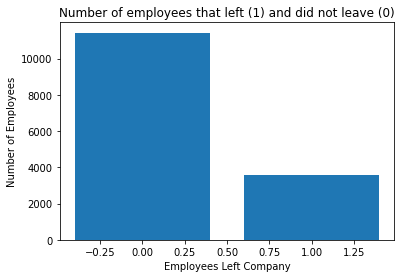

In [9]:
left_count=HRdf.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.title('Number of employees that left (1) and did not leave (0)')
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [10]:
#Here, you can see that out of 15,000 approx 3,571 left ('left' column =1), and 11,428 stayed. The no of employee left is 23 % of the total employee.
HRdf.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [11]:
#Here, you can see that out of 15,000 approx 319  got a promotion within last 5 yrs. ('promotion_last_5years' column =1), and 14,680 did not get a promotion. The no of employee promoted is 2.12% of the total employee.
HRdf.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

Number of Projects

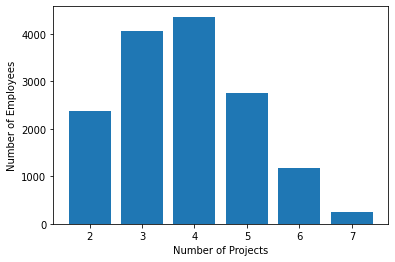

In [12]:
# bar chart to show the number of projects employees are involved in?

num_projects=HRdf.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

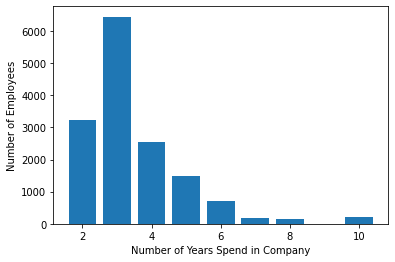

In [13]:
#Time Spent in Company ~ as an indicator of employee work experience
# bar chart to show the number of employees and their years of experience in the company?
time_spent=HRdf.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()


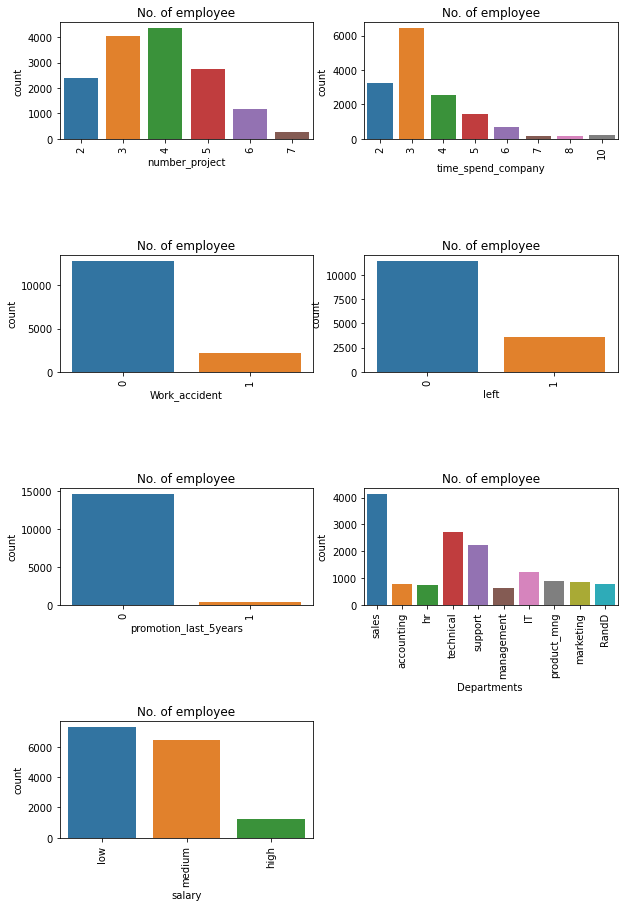

In [14]:
#Subplots using Seaborn library to plot all the graphs in a single cell.
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = HRdf)
    plt.xticks(rotation=90)
    plt.title("No. of employee")

From the above visualization:

Most of the employee were involved in 3-5 projects.

The highest number of employee have 3 years of experience then it tapers off.

The number of employee that quit is about [3571 / (11428+3571)] 23.8 %.

The number of employee promoted in the last 5 year is about [319 / (14680+319)] 2.1%

The sales department has the maximum no.of employee followed by technical and support

Most of the employees are earning in the medium or low salary range.

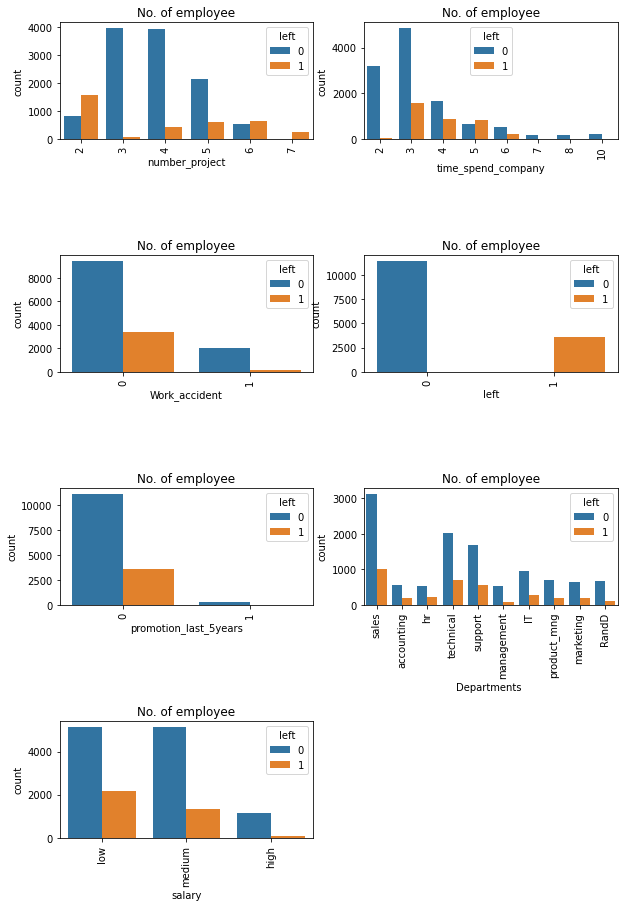

In [15]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = HRdf, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

Those employees who are involved in more than 5 projects leave the company.

The employee who had done 6 and 7 projects, over worked, tend to leave.

Most employee leave after 3 to 5 years at the company.

Employees that had a promotion in the last 5 years tend to stay, i.e., all those left they didn't get the promotion in the last 5 years.

Data Analysis and Visualization Summary:

The features that most influence a person to leave the company:

Promotions: Employees are far more likely to quit their job if they did not get promoted in the last 5 years.

Time with Company: The three-year mark looks like a critical point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.

Number Of Projects: Employee engagement is another critical factor to influence the employee to quit. Employees with 3-5 projects are less likely to leave the company. 

Salary: Most of the employees that quit are among the low salary category.

Cluster Analysis:

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [16]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  HRdf[['satisfaction_level', 'last_evaluation']][HRdf.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

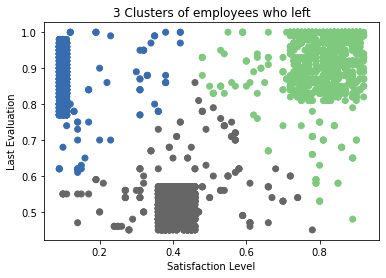

In [17]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()


Here, Employee who left the company can be grouped into 3 type of employees:
High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

Building a Prediction Model

Pre-Processing Data
Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.

In [18]:
HRdf # see 'Departments' & 'salary' columns. 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [19]:
n = HRdf.nunique(axis=0) # unique values in dataframe HRdf ~ there are 10 unique departments and 3 unique salary grouping
n

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [20]:

#imported preprocessing module and created Label Encoder object to fit and transform "salary" and "Departments " column into numeric column.
# there are 3 levels of 'Salary' ~ "Low", "Medium" & "High"
# There are 10 'Department' ~ "accounting","hr","IT","management","marketing","product_mng","RandD","sales",suppport",& "technical" 
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
HRdf['salary']=le.fit_transform(HRdf['salary'])
HRdf['Departments ']=le.fit_transform(HRdf['Departments '])

In [21]:
# Look at the 'Department' and the 'salary ' columnafter the transformation
HRdf


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


Split the dataframe into Training and Testing Set using sklearn

train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

Divide the dataset into training and testing set by splitting the HRdf dataset using the function "train_test_split()" function. 

3 parameters are needed as input to the function: features, target, and test_set size, typically 25 to 30% for testing.

Use random_state to select records randomly.

In [22]:
# create the X and y variable array 
X=HRdf[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']] # the X variable includes all 9 features
# or just drop the 'left' variable
#HRdf. drop('left', axis=1, inplace=True) 
y=HRdf['left'] # the target variable is the 'left' variable

In [23]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

**There are a number of classification models:**
1.   logistic regression 
2.   decision tree
1.   random forest
1.   gradient-boosted tree
2.   multilayer perceptron
2.   one-vs-rest
1.   Naive Bayes.
Below are two that is demostrated ('Gradient Boosting' and 'Logistic Regression'

***Model Building (using Gradient Boosting Classifier)***

Using Gradient Boosting Classifier. 
First, import the GradientBoostingClassifier module and create Gradient Boosting classifier object using GradientBoostingClassifier() function. 
Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [36]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


***Model Building (using Logistic Regression)***

Logistic Regression to predict churn. First, import the Logistic Regression module and create Logistic Regression object using LogisticRegression(solver='lbfgs', max_iter=1000) function. Then, fit your model on train set using fit() and perform prediction on the test set using predict().

In [30]:
# Use Logistic Regression to predict
# Import the Scikit Learn Logistic Regression module 
from sklearn.linear_model import LogisticRegression

#Create Logistic regression Classifier
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

#Train the model using the training sets
logreg.fit(X_train,y_train) 

#Predict the response for test dataset
y_pred = logreg.predict(X_test)


Evaluating Model Performance

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7602222222222222
Precision: 0.4932301740812379
Recall: 0.23787313432835822


Accuracy: Accuracy (classification) rate of 97% (Gradient Boosting Classifier), 76%  (Logistic Regression). 

Precision: 
Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when you predicted an employee is going to leave, that employee actually left 95% (Gradient Boosting model), 49% (Logistic Regression) of the time. 

Recall: If there is an employee who left present in the test set and your model can identify it 92% (Gradient Boosting), 23% (Logistic Regression) of the time.
So which model is the better of the two?


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True` above.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[ 987   85]
 [  43 3385]]


In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[ 987   85]
 [  43 3385]]


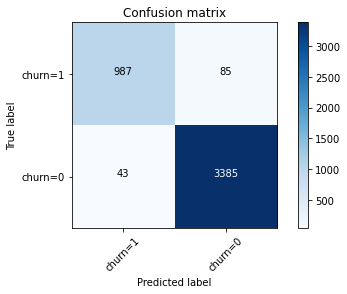

In [39]:
#Plot non-normalized confusion matrix
# Square "AA" is how many class A (churned) were correctly predicted, square "BB" is how many class B (not churned) were correctly predicted
# Square "AB" is how many class A (churned) were incorrectly predicted, square "BA" is how many class B (not churned) were correctly predicted
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [40]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3428
           1       0.96      0.92      0.94      1072

    accuracy                           0.97      4500
   macro avg       0.97      0.95      0.96      4500
weighted avg       0.97      0.97      0.97      4500

